In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def show_image(img, title):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
    plt.show()

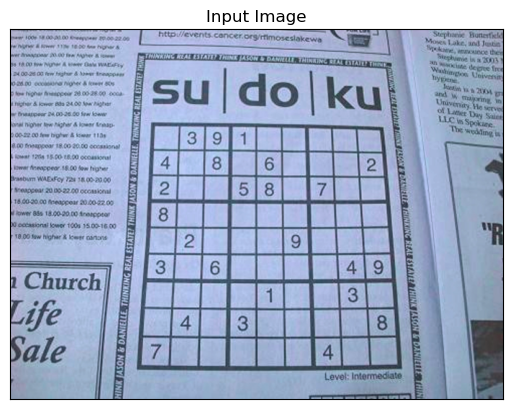

In [3]:
im = cv2.imread('sudoku.png')

show_image(im, 'Input Image')

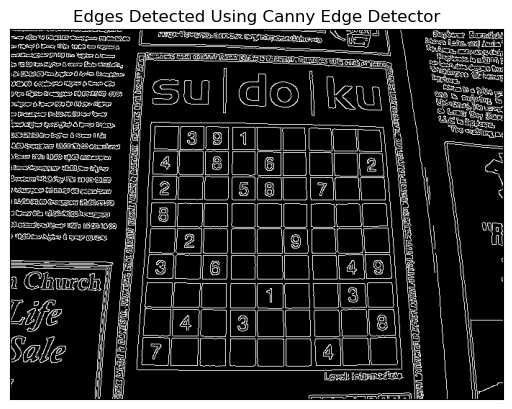

In [4]:
gray_img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

canny_edges = cv2.Canny(gray_img, 100, 200, apertureSize=3)

show_image(canny_edges, 'Edges Detected Using Canny Edge Detector')

In [5]:
lines = cv2.HoughLines(canny_edges, 1, np.pi / 180, 250)

In [6]:
for line in lines:
    r, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    
    x0, y0 = a * r, b * r
    x1, y1 = int(x0 - 1000 * b), int(y0 + 1000 * a)
    x2, y2 = int(x0 + 1000 * b), int(y0 - 1000 * a)
    
    cv2.line(im, (x1, y1), (x2, y2), (0, 255, 0), 2)

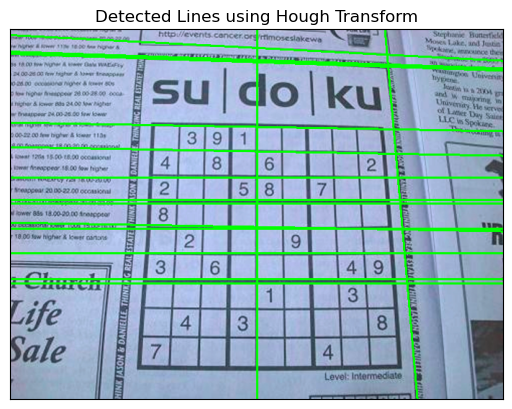

In [7]:
show_image(im, 'Detected Lines using Hough Transform')

In [8]:
im = cv2.imread('sudoku.png')

In [9]:
lines = cv2.HoughLinesP(canny_edges, 1, np.pi / 180, 127, minLineLength=5, maxLineGap=10)

In [10]:
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(im, (x1, y1), (x2, y2), (0, 255, 0), 2)

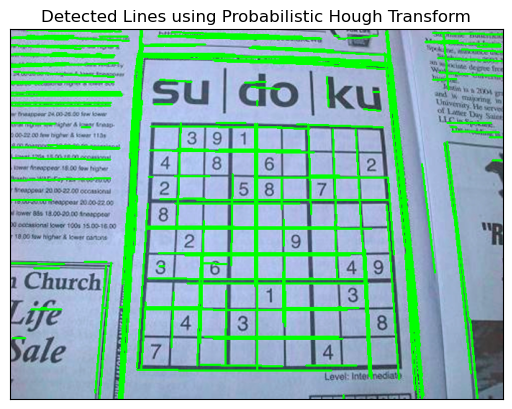

In [11]:
show_image(im, 'Detected Lines using Probabilistic Hough Transform')